In [265]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Научимся сгружать все csv-шки

In [266]:
import pandas as pd
import glob
import os

# # Specify the directory path
# path = 'gdrive/MyDrive/CSV_for_econ/'
path = 'data/'

# # Find all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# # Read each CSV file into a DataFrame
df_list = []
for file in csv_files:
    df_list.append(pd.read_csv(file))
    df_list[-1]["number_of_files"] = file

# # Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)
big_df.rename(columns={'Unnamed: 0': 'time'}, inplace=True)

big_df = big_df.groupby(['time', 'sector', 'number_of_files']).mean().reset_index()
big_df = big_df.drop(["number_of_files"], axis=1)
big_df.head(20)


,time,sector,propotion_of_iceberg,spred,depth_sum,volatitlity
0,10,0,0.058947,0.004667,276.333333,0.030087
1,10,0,0.008939,0.001519,208.333333,0.006074
2,10,0,0.057861,0.002126,200.000000,0.006485
3,10,0,0.013030,0.002167,173.000000,0.013745
4,10,0,0.093259,0.002460,206.000000,0.008268
5,10,0,0.046758,0.004626,200.333333,0.001998
6,10,0,0.010113,0.003449,222.333333,0.024387
7,10,0,0.262823,0.004215,273.333333,0.001146
8,10,0,0.053945,0.006000,220.333333,0.000393
9,10,0,0.084874,0.007204,219.000000,0.000804


Сделам небольшой фича инженеринг: заванхотим категориальные фичи, сделаем норм название столбцов, наны уберем,

In [267]:
big_df["sector"] = pd.Categorical(big_df["sector"])
big_df.head(2)

,time,sector,propotion_of_iceberg,spred,depth_sum,volatitlity
0,10,0,0.058947,0.004667,276.333333,0.030087
1,10,0,0.008939,0.001519,208.333333,0.006074


In [268]:
# One-hot encode column 'sector'
# df_encoded = pd.get_dummies(big_df, columns=['sector', 'time'], dtype=float,  drop_first=True)
df_encoded = pd.get_dummies(big_df, columns=['sector', 'time'], dtype=float,  drop_first=False)
df_encoded = df_encoded.drop(["sector_1", "time_15"], axis=1)

big_df = df_encoded
big_df

,propotion_of_iceberg,spred,depth_sum,volatitlity,sector_0,sector_2,time_10,time_11,time_12,time_13,time_14,time_16,time_17,time_18
0,0.058947,0.004667,276.333333,0.030087,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.008939,0.001519,208.333333,0.006074,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.057861,0.002126,200.000000,0.006485,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.013030,0.002167,173.000000,0.013745,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.093259,0.002460,206.000000,0.008268,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0.074811,0.059017,632.333333,0.075967,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
509,0.008197,0.198703,895.666667,0.171339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510,0.028600,0.043267,903.333333,0.334386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511,0.032030,0.130553,880.666667,0.056625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [269]:
# df_encoded = pd.get_dummies(big_df, columns=['time'], dtype=float,  drop_first=True)
# big_df = df_encoded
# big_df

In [270]:
# пропуски должны быть 0-ми, у нас это нан - сделаем их 0

big_df = big_df.fillna(0)

big_df.head(5)

,propotion_of_iceberg,spred,depth_sum,volatitlity,sector_0,sector_2,time_10,time_11,time_12,time_13,time_14,time_16,time_17,time_18
0,0.058947,0.004667,276.333333,0.030087,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.008939,0.001519,208.333333,0.006074,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.057861,0.002126,200.000000,0.006485,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.013030,0.002167,173.000000,0.013745,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.093259,0.002460,206.000000,0.008268,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


посмотрим как выглядят depth sum

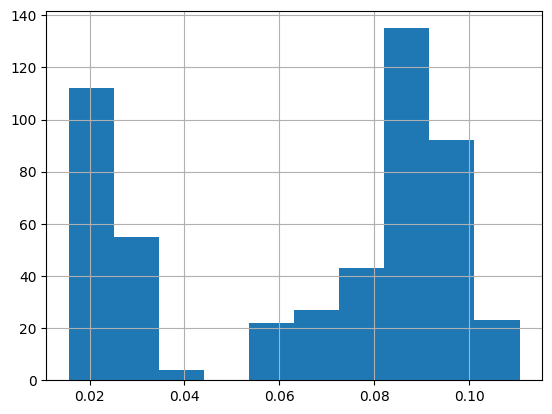

In [271]:
import matplotlib.pyplot as plt

big_df['depth_sum'] /= 10000
big_df['depth_sum'].hist()
plt.show()

In [272]:
# выкинем лишние столбцы
#big_df = big_df[big_df.columns.drop(['depth_sum'])]
#big_df.head(2)

In [273]:
# big_df['col_with_1'] = 1

# big_df.head(5)

In [274]:
# типо юнит тесты - чтобы посмотреть на y и x

In [275]:
big_df['propotion_of_iceberg']

0      0.058947
1      0.008939
2      0.057861
3      0.013030
4      0.093259
         ...   
508    0.074811
509    0.008197
510    0.028600
511    0.032030
512    0.060315
Name: propotion_of_iceberg, Length: 513, dtype: float64

In [276]:
big_df[big_df.columns.drop('propotion_of_iceberg')]

,spred,depth_sum,volatitlity,sector_0,sector_2,time_10,time_11,time_12,time_13,time_14,time_16,time_17,time_18
0,0.004667,0.027633,0.030087,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001519,0.020833,0.006074,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002126,0.020000,0.006485,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002167,0.017300,0.013745,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002460,0.020600,0.008268,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0.059017,0.063233,0.075967,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
509,0.198703,0.089567,0.171339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510,0.043267,0.090333,0.334386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511,0.130553,0.088067,0.056625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [277]:
import statsmodels.api as sm

In [278]:
x = sm.add_constant(big_df[big_df.columns.drop('propotion_of_iceberg')])  # Add a constant term
model = sm.OLS(big_df['propotion_of_iceberg'], x).fit()  # Fit the OLS model

In [279]:
summary = model.summary()

In [280]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     propotion_of_iceberg   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.017
Method:                   Least Squares   F-statistic:                     1.665
Date:                  Mon, 06 May 2024   Prob (F-statistic):             0.0651
Time:                          23:09:42   Log-Likelihood:                -379.87
No. Observations:                   513   AIC:                             787.7
Df Residuals:                       499   BIC:                             847.1
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1809      0.302      0.599      0.549      -0.412       0.774
spred           0.1732      0.469      0.369      0.712      -0.749       1.095
depth_sum      -1.1915      3.077     -0.387      0.699      -7.236       4.853
volatitlity    -0.1769      0.339     -0.521      0.602      -0.843       0.490
sector_0       -0.0972      0.219     -0.443      0.658      -0.528       0.334
sector_2       -0.0904      0.114     -0.793      0.428      -0.314       0.134
time_10         0.0162      0.102      0.158      0.874      -0.185       0.217
time_11         0.0119      0.098      0.122      0.903      -0.181       0.205
time_12        -0.0089      0.097     -0.091      0.927      -0.199       0.182
time_13         0.0062      0.097      0.064      0.949      -0.184       0.196
time_14         0.0028      0.096      0.029      0.976      -0.187       0.192
time_16         0.0041      0.097      0.043      0.966      -0.186       0.194
time_17         0.0250      0.097      0.258      0.797      -0.165       0.215
time_18         0.3391      0.098      3.471      0.001       0.147       0.531
==============================================================================
Omnibus:                     1078.315   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1615203.733
Skew:                          15.710   Prob(JB):                         0.00
Kurtosis:                     276.090   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Сделаем всякие тесты

In [281]:
import statsmodels.stats.diagnostic as smd
resid = model.resid

# Perform the Breusch-Pagan test
lm_stat, lm_pvalue, f_stat, f_pvalue = smd.het_breuschpagan(resid, model.model.exog)

# Print the test results
print(f"Breusch-Pagan Test:")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"LM p-value: {lm_pvalue:.4f}")
print(f"F Statistic: {f_stat:.4f}")
print(f"F p-value: {f_pvalue:.4f}")

Breusch-Pagan Test:
LM Statistic: 16.1696
LM p-value: 0.2401
F Statistic: 1.2492
F p-value: 0.2408


In [282]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroskedasticity
white_test = het_white(model.resid, model.model.exog)

# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 37.088349026508986, 'Test Statistic p-value': 0.997912341009092, 'F-Statistic': 0.5359266216400824, 'F-Test p-value': 0.9987508375472303}


получается есть гетеростендандандантичность

Тогда запустим робастный метод

In [283]:
x = sm.add_constant(big_df[big_df.columns.drop('propotion_of_iceberg')])  # Add a constant term
model = sm.OLS(big_df['propotion_of_iceberg'], x).fit(cov_type='HC3')  # Fit the OLS model

In [284]:
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     propotion_of_iceberg   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.017
Method:                   Least Squares   F-statistic:                    0.9354
Date:                  Mon, 06 May 2024   Prob (F-statistic):              0.516
Time:                          23:09:42   Log-Likelihood:                -379.87
No. Observations:                   513   AIC:                             787.7
Df Residuals:                       499   BIC:                             847.1
Df Model:                            13                                         
Covariance Type:                    HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1809      0.152      1.188      0.235      -0.118       0.479
spred           0.1732      0.193      0.898      0.369      -0.205       0.552
depth_sum      -1.1915      1.391     -0.857      0.392      -3.917       1.534
volatitlity    -0.1769      0.179     -0.986      0.324      -0.529       0.175
sector_0       -0.0972      0.126     -0.769      0.442      -0.345       0.151
sector_2       -0.0904      0.089     -1.015      0.310      -0.265       0.084
time_10         0.0162      0.026      0.628      0.530      -0.034       0.067
time_11         0.0119      0.014      0.857      0.391      -0.015       0.039
time_12        -0.0089      0.012     -0.732      0.464      -0.033       0.015
time_13         0.0062      0.014      0.430      0.667      -0.022       0.034
time_14         0.0028      0.012      0.239      0.811      -0.020       0.026
time_16         0.0041      0.012      0.343      0.732      -0.019       0.028
time_17         0.0250      0.014      1.772      0.076      -0.003       0.053
time_18         0.3391      0.210      1.613      0.107      -0.073       0.751
==============================================================================
Omnibus:                     1078.315   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1615203.733
Skew:                          15.710   Prob(JB):                         0.00
Kurtosis:                     276.090   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [285]:
import statsmodels.stats.diagnostic as smd
resid = model.resid

# Perform the Breusch-Pagan test
lm_stat, lm_pvalue, f_stat, f_pvalue = smd.het_breuschpagan(resid, model.model.exog)

# Print the test results
print(f"Breusch-Pagan Test:")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"LM p-value: {lm_pvalue:.4f}")
print(f"F Statistic: {f_stat:.4f}")
print(f"F p-value: {f_pvalue:.4f}")

Breusch-Pagan Test:
LM Statistic: 16.1696
LM p-value: 0.2401
F Statistic: 1.2492
F p-value: 0.2408


In [286]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroskedasticity
white_test = het_white(model.resid, model.model.exog)

# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 37.088349026508986, 'Test Statistic p-value': 0.997912341009092, 'F-Statistic': 0.5359266216400824, 'F-Test p-value': 0.9987508375472303}


Попробуем другую линейную модель

In [287]:
x = sm.add_constant(big_df[big_df.columns.drop('propotion_of_iceberg')])  # Add a constant term
robust_model = sm.RLM(big_df['propotion_of_iceberg'], x, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

summary = robust_results.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Robust linear Model Regression Results                     
================================================================================
Dep. Variable:     propotion_of_iceberg   No. Observations:                  513
Model:                              RLM   Df Residuals:                      499
Method:                            IRLS   Df Model:                           13
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Mon, 06 May 2024                                         
Time:                          23:09:42                                         
No. Iterations:                      21                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0162      0.021     -0.762      0.446      -0.058       0.026
spred          -0.0303      0.033     -0.917      0.359      -0.095       0.034
depth_sum       0.4884      0.217      2.252      0.024       0.063       0.913
volatitlity     0.0167      0.024      0.700      0.484      -0.030       0.064
sector_0        0.0342      0.015      2.211      0.027       0.004       0.064
sector_2        0.0192      0.008      2.387      0.017       0.003       0.035
time_10         0.0164      0.007      2.276      0.023       0.002       0.031
time_11         0.0209      0.007      3.021      0.003       0.007       0.034
time_12         0.0021      0.007      0.311      0.756      -0.011       0.016
time_13         0.0040      0.007      0.580      0.562      -0.009       0.017
time_14         0.0052      0.007      0.762      0.446      -0.008       0.019
time_16         0.0033      0.007      0.481      0.630      -0.010       0.017
time_17         0.0124      0.007      1.820      0.069      -0.001       0.026
time_18         0.0154      0.007      2.233      0.026       0.002       0.029
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [288]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroskedasticity
white_test = het_white(robust_results.resid, robust_results.model.exog)

# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 36.65849622831391, 'Test Statistic p-value': 0.9982502488931707, 'F-Statistic': 0.5292372314435607, 'F-Test p-value': 0.9989668384098239}
